In [1]:
datapath = '/home/droumis/data/Steinmetz-2019/npz/'

In [146]:
from scipy.stats import zscore
from sklearn.decomposition import PCA 


import os, requests
import numpy as np
#@title import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [5]:
fname = []
for j in range(3):
  fname.append(f'{datapath}steinmetz_part%d.npz'%j)

In [6]:
#@title Data loading
import numpy as np

alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat, np.load(f'{datapath}steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))

# select just one of the recordings here. 11 is nice because it has some neurons in vis ctx. 
dat = alldat[11]
print(dat.keys())

dict_keys(['spks', 'wheel', 'pupil', 'lfp', 'response', 'response_time', 'bin_size', 'stim_onset', 'contrast_right', 'contrast_left', 'brain_area', 'brain_area_lfp', 'feedback_time', 'feedback_type', 'gocue', 'mouse_name', 'date_exp', 'trough_to_peak', 'waveform_w', 'waveform_u', 'active_trials', 'contrast_left_passive', 'contrast_right_passive', 'spks_passive', 'lfp_passive', 'pupil_passive', 'wheel_passive'])


In [8]:
dat['mouse_name']

'Lederberg'

In [9]:
dat['date_exp']

'2017-12-05'

In [11]:
dat['spks'].shape

(698, 340, 250)

In [13]:
dat['brain_area'].shape

(698,)

In [15]:
dat['contrast_right'].shape

(340,)

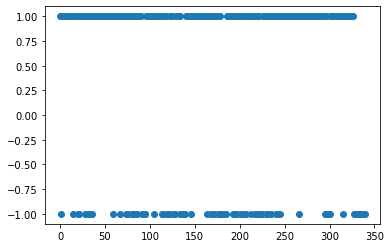

In [24]:
plt.scatter(np.arange(len(dat['feedback_type'])),dat['feedback_type'])

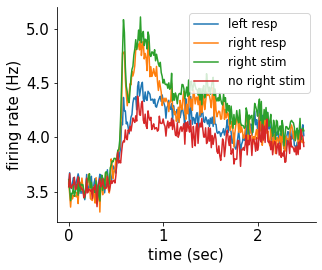

In [26]:
#@title basic plots of population average
from matplotlib import pyplot as plt
dt = dat['bin_size'] # binning at 10 ms
NT = dat['spks'].shape[-1]

ax = plt.subplot(1,5,1)
response = dat['response'] # right - nogo - left (-1, 0, 1)
vis_right = dat['contrast_right'] # 0 - low - high
vis_left = dat['contrast_left'] # 0 - low - high
plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:,response>=0].mean(axis=(0,1))) # left responses
plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:,response<0].mean(axis=(0,1))) # right responses
plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:,vis_right>0].mean(axis=(0,1))) # stimulus on the right
plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:,vis_right==0].mean(axis=(0,1))) # no stimulus on the right

plt.legend(['left resp', 'right resp', 'right stim', 'no right stim'], fontsize=12)
ax.set(xlabel  = 'time (sec)', ylabel = 'firing rate (Hz)');

In [237]:
dt = dat['bin_size'] # binning at 10 ms
NT = dat['spks'].shape[-1]


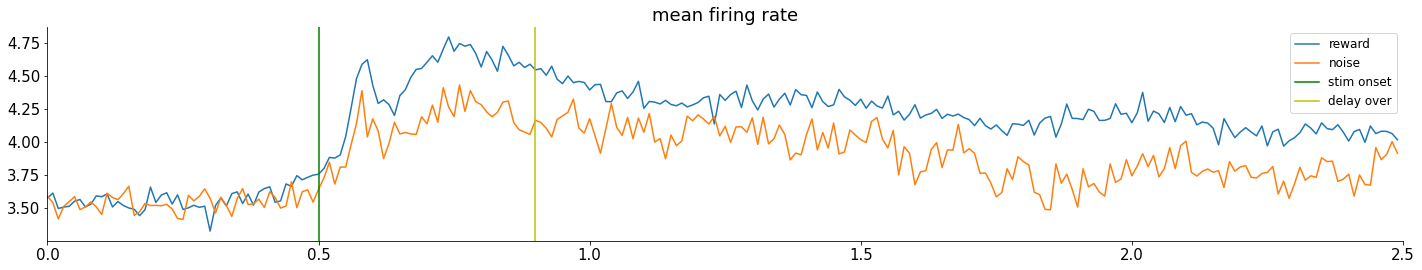

In [242]:
plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:,dat['feedback_type']>0].mean(axis=(0,1))) # correct responses
plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:,dat['feedback_type']<0].mean(axis=(0,1))) # incorrect responses
plt.axvline(.5, c='g')
plt.title('mean firing rate')
plt.axvline(.9, c='y')
plt.legend(['reward', 'noise', 'stim onset', 'delay over'], fontsize=12)
plt.xlim((0,2.5))
ax.set(xlabel  = 'time (sec)', ylabel = 'firing rate (Hz)');
plt.savefig('/home/droumis/Src/capuchin/figures/mean_fr.png')
plt.show()


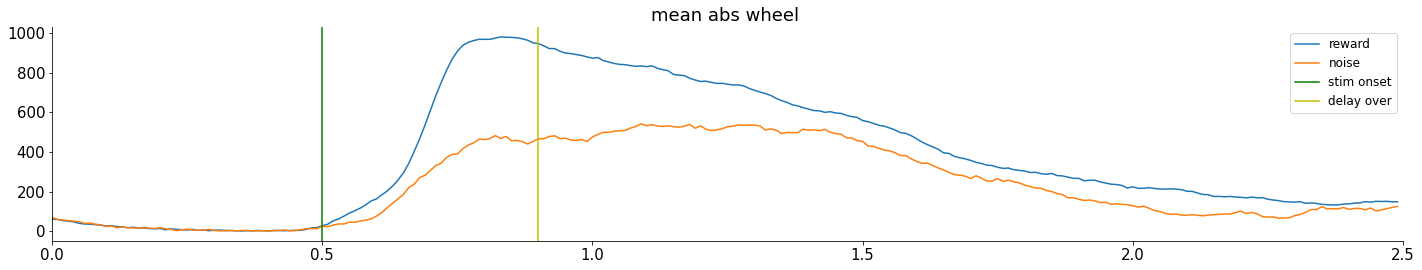

In [243]:
plt.plot(dt * np.arange(NT), np.abs(1/dt * dat['wheel'][:,dat['feedback_type']>0]).mean(axis=(0,1))) # correct responses
plt.plot(dt * np.arange(NT), np.abs(1/dt * dat['wheel'][:,dat['feedback_type']<0]).mean(axis=(0,1))) # incorrect responses
plt.axvline(.5, c='g')
plt.title('mean abs wheel ')
plt.axvline(.9, c='y')
plt.legend(['reward', 'noise', 'stim onset', 'delay over'], fontsize=12)
plt.xlim((0,2.5))
ax.set(xlabel  = 'time (sec)', ylabel = 'firing rate (Hz)');
plt.savefig('/home/droumis/Src/capuchin/figures/mean_abs_wheel.png')
plt.show()

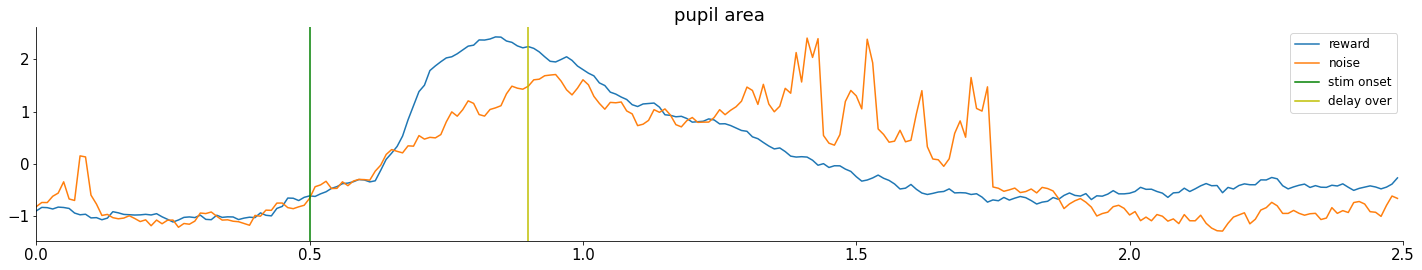

In [244]:
plt.plot(dt * np.arange(NT), zscore(1/dt * dat['pupil'][:,dat['feedback_type']>0].mean(axis=(0,1)))) # correct responses
plt.plot(dt * np.arange(NT), zscore(1/dt * dat['pupil'][:,dat['feedback_type']<0].mean(axis=(0,1)))) # incorrect responses
plt.axvline(.5, c='g')
plt.title('pupil area')
plt.axvline(.9, c='y')
plt.legend(['reward', 'noise', 'stim onset', 'delay over'], fontsize=12)
plt.xlim((0,2.5))
ax.set(xlabel  = 'time (sec)', ylabel = 'firing rate (Hz)');
plt.savefig('/home/droumis/Src/capuchin/figures/pupil_area.png')
plt.show()

Get actual interval of activity preceding response

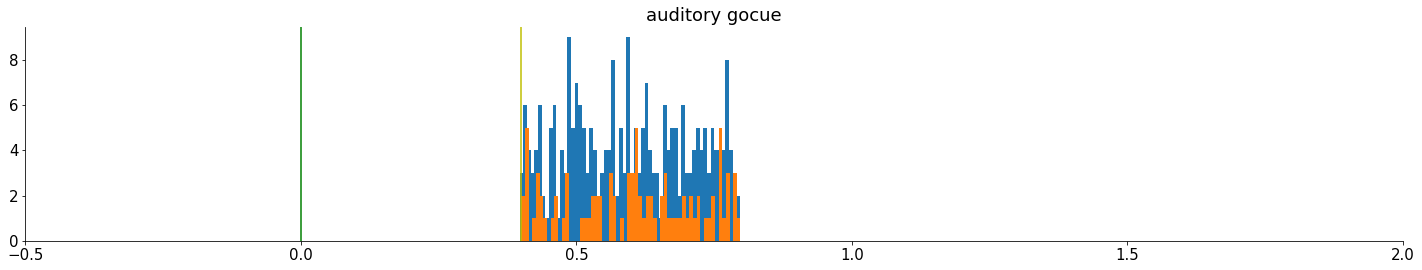

In [245]:
plt.hist(dat['gocue'][dat['feedback_type']>0], bins=60)
plt.hist(dat['gocue'][dat['feedback_type']<0], bins=60)
plt.title('auditory gocue')
plt.axvline(0, c='g')
plt.axvline(.4, c='y')
# plt.legend(['reward', 'noise', 'stim onset', 'delay over'])
plt.xlim((-.5,2))
plt.savefig('/home/droumis/Src/capuchin/figures/aud_gocue.png')
plt.show()

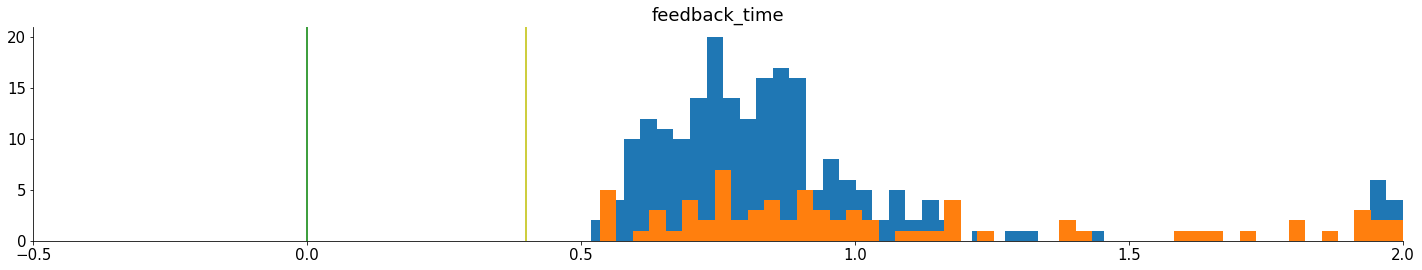

In [246]:
plt.hist(dat['feedback_time'][dat['feedback_type']>0], bins=60)
plt.hist(dat['feedback_time'][dat['feedback_type']<0], bins=60)
plt.title('feedback_time')
plt.axvline(0, c='g')
plt.axvline(.4, c='y')
# plt.legend(['reward', 'noise', 'stim onset', 'delay over'])
plt.xlim((-.5,2))
plt.savefig('/home/droumis/Src/capuchin/figures/feedback_time.png')
plt.show()

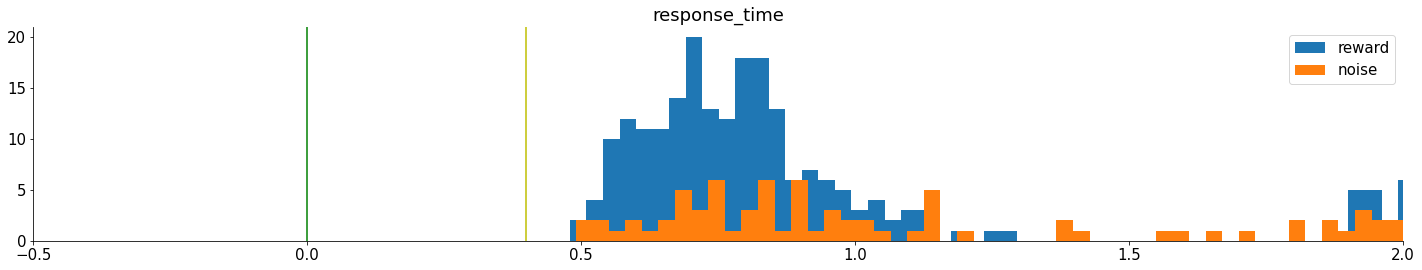

In [247]:
plt.hist(dat['response_time'][dat['feedback_type']>0], bins=60)
plt.hist(dat['response_time'][dat['feedback_type']<0], bins=60)
plt.title('response_time')
plt.legend(['reward', 'noise'])
plt.axvline(0, c='g')
plt.axvline(.4, c='y')
# plt.legend(['reward', 'noise', 'stim onset', 'delay over'])
plt.xlim((-.5,2))
plt.savefig('/home/droumis/Src/capuchin/figures/resp_time.png')
plt.show()

In [151]:
# groupings of brain regions
regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia", "cortical subplate", "other"]
brain_groups = [["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"], # visual cortex
                ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT", "RT", "SPF", "TH", "VAL", "VPL", "VPM"], # thalamus
                ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"], # hippocampal
                ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", "ORBm", "PIR", "PL", "SSp", "SSs", "RSP"," TT"], # non-visual cortex
                ["APN", "IC", "MB", "MRN", "NB", "PAG", "RN", "SCs", "SCm", "SCig", "SCsg", "ZI"], # midbrain
                ["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"], # basal ganglia 
                ["BLA", "BMA", "EP", "EPd", "MEA"] # cortical subplate
                ]

nareas = 4 # only the top 4 regions are in this particular mouse
NN = len(dat['brain_area']) # number of neurons
barea = nareas * np.ones(NN, ) # last one is "other"
for j in range(nareas):
  barea[np.isin(dat['brain_area'], brain_groups[j])] = j # assign a number to each region

In [164]:
response = dat['response'] # right - nogo - left (-1, 0, 1)
vis_right = dat['contrast_right'] # 0 - low - high
vis_left = dat['contrast_left'] # 0 - low - high
is_correct = np.sign(response)==np.sign(vis_left-vis_right)

# sort by correct, and then by response
isort = np.argsort(-is_correct.astype('float32') + response/10) 

# top PCs for entire trial
- pre-stim (0:500ms)
- stim (500:900ms)
- resp (900:2500ms)

In [248]:

start_duration = 0 # in 10ms bin units
end_duration = 250 # in 10ms bin units

NN = len(dat['brain_area']) # number of neurons
NT = dat['spks'][:,:,start_duration:end_duration].shape[-1]

droll = np.reshape(dat['spks'][:,:,start_duration:end_duration], (NN,-1)) # first 80 bins = 1.6 sec
droll = droll - np.mean(droll, axis=1)[:, np.newaxis]
model = PCA(n_components = 5).fit(droll.T)
W = model.components_
pc_10ms = W @ np.reshape(dat['spks'][:,:,start_duration:end_duration], (NN,-1))
pc_10ms = np.reshape(pc_10ms, (5, -1, NT))

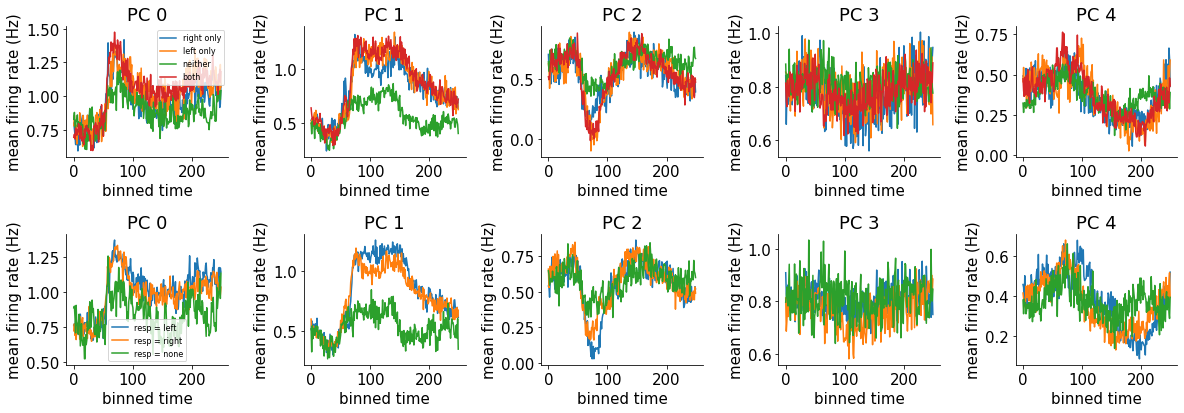

In [249]:
#@title The top PCs capture most variance across the brain. What do they care about? 
plt.figure(figsize= (20, 6))
for j in range(len(pc_10ms)):
  ax = plt.subplot(2,len(pc_10ms)+1,j+1)
  pc1 = pc_10ms[j]

  plt.plot(pc1[np.logical_and(vis_left==0, vis_right>0), :].mean(axis=0))  
  plt.plot(pc1[np.logical_and(vis_left>0, vis_right==0), :].mean(axis=0))
  plt.plot(pc1[np.logical_and(vis_left==0, vis_right==0), :].mean(axis=0))
  plt.plot(pc1[np.logical_and(vis_left>0, vis_right>0), :].mean(axis=0))
   
  if j==0:
    plt.legend(['right only', 'left only', 'neither', 'both'], fontsize=8)
  ax.set(xlabel = 'binned time', ylabel = 'mean firing rate (Hz)')
  plt.title('PC %d'%j)

  ax = plt.subplot(2,len(pc_10ms)+1,len(pc_10ms)+1 + j+1)
  
  plt.plot(pc1[response>0, :].mean(axis=0))  
  plt.plot(pc1[response<0, :].mean(axis=0))
  plt.plot(pc1[response==0, :].mean(axis=0))

  if j==0:
    plt.legend(['resp = left', 'resp = right', 'resp = none'], fontsize=8)
  ax.set(xlabel = 'binned time', ylabel = 'mean firing rate (Hz)')
  plt.title('PC %d'%j)

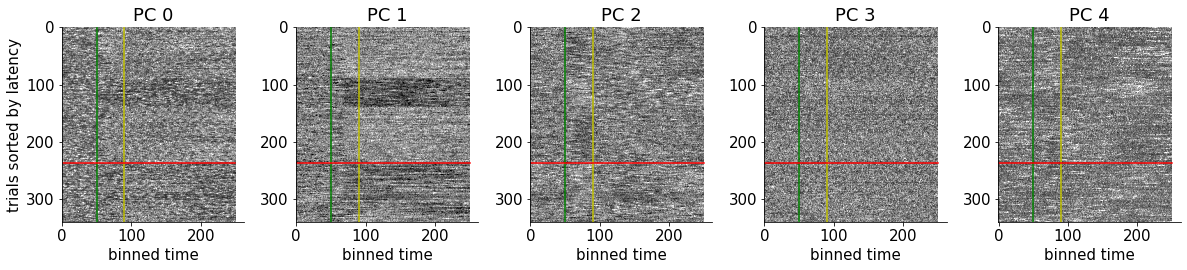

In [250]:

nwrong = np.sum(is_correct)
for j in range(len(pc_10ms)):
  ax = plt.subplot(1,len(pc_10ms)+1,j+1)
  pc1 = zscore(pc_10ms[j])
  plt.imshow(pc1[isort, :], aspect='auto', vmax=2, vmin = -2, cmap = 'gray')
  ax.set(xlabel = 'binned time')
  plt.axvline(50, c='g')
  plt.axvline(90, c='y')
  if j==0:
    ax.set(ylabel = 'trials sorted by latency')  
  plt.title('PC %d'%j)

  plt.plot([0, NT], [nwrong, nwrong], 'r')
plt.savefig('/home/droumis/Src/capuchin/figures/PCA_allPeriods_5PC.png')
plt.show()
    

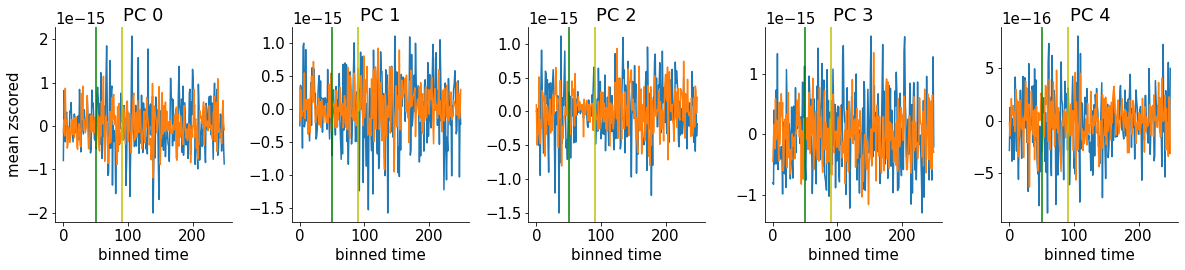

In [251]:
nwrong = np.sum(is_correct)
for j in range(len(pc_10ms)):
  ax = plt.subplot(1,len(pc_10ms)+1,j+1)
  pc1_corr = zscore(pc_10ms[j][is_correct,:])
  pc1_err = zscore(pc_10ms[j][~is_correct,:])
  plt.plot(np.mean(pc1_corr, axis=0))
  plt.plot(np.mean(pc1_err, axis=0))
  ax.set(xlabel = 'binned time')
  plt.axvline(50, c='g')
  plt.axvline(90, c='y')
  if j==0:
    ax.set(ylabel = 'mean zscored')  
  plt.title('PC %d'%j)
plt.savefig('/home/droumis/Src/capuchin/figures/PCA_allPeriods_5PC_mean.png')
plt.show()
#   plt.plot([0, NT], [nwrong, nwrong], 'r')

# top PCs for pre-stim period
- pre-stim (0:500ms)

In [252]:

start_duration = 0 # in 10ms bin units
end_duration = 50 # in 10ms bin units

NN = len(dat['brain_area']) # number of neurons
NT = dat['spks'][:,:,start_duration:end_duration].shape[-1]

droll = np.reshape(dat['spks'][:,:,start_duration:end_duration], (NN,-1)) # first 80 bins = 1.6 sec
droll = droll - np.mean(droll, axis=1)[:, np.newaxis]
model = PCA(n_components = 5).fit(droll.T)
W = model.components_
pc_10ms = W @ np.reshape(dat['spks'][:,:,start_duration:end_duration], (NN,-1))
pc_10ms = np.reshape(pc_10ms, (5, -1, NT))

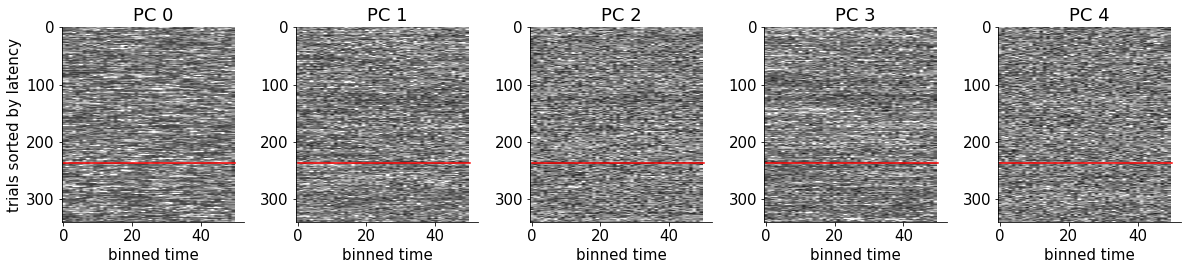

In [253]:

nwrong = np.sum(is_correct)
for j in range(len(pc_10ms)):
  ax = plt.subplot(1,len(pc_10ms)+1,j+1)
  pc1 = zscore(pc_10ms[j])
  plt.imshow(pc1[isort, :], aspect='auto', vmax=2, vmin = -2, cmap = 'gray')
  ax.set(xlabel = 'binned time')
#   plt.axvline(50, c='g')
#   plt.axvline(90, c='y')
  if j==0:
    ax.set(ylabel = 'trials sorted by latency')  
  plt.title('PC %d'%j)

  plt.plot([0, NT], [nwrong, nwrong], 'r')
plt.savefig('/home/droumis/Src/capuchin/figures/PCA_prestim_5PC.png')
plt.show()
    

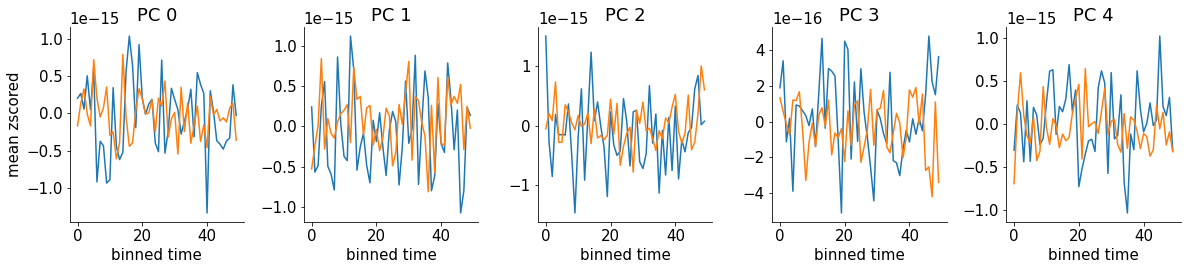

In [254]:
nwrong = np.sum(is_correct)
for j in range(len(pc_10ms)):
  ax = plt.subplot(1,len(pc_10ms)+1,j+1)
  pc1_corr = zscore(pc_10ms[j][is_correct,:])
  pc1_err = zscore(pc_10ms[j][~is_correct,:])
  plt.plot(np.mean(pc1_corr, axis=0))
  plt.plot(np.mean(pc1_err, axis=0))
  ax.set(xlabel = 'binned time')
#   plt.axvline(50, c='g')
#   plt.axvline(90, c='y')
  if j==0:
    ax.set(ylabel = 'mean zscored')  
  plt.title('PC %d'%j)
plt.savefig('/home/droumis/Src/capuchin/figures/PCA_prestim_5PC_mean.png')
plt.show()
#   plt.plot([0, NT], [nwrong, nwrong], 'r')

# run GLM with log link func using pre-stim PCs as features and correct as outcome

In [257]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [258]:
is_correct.shape

(340,)

In [259]:
prestim_pc_mean = np.mean(pc_10ms, axis = 2).T

In [260]:
X = prestim_pc_mean
y = is_correct

In [261]:
# First define the model
log_reg = LogisticRegression(penalty="none")

#Then fit it to data
log_reg.fit(X, y)

LogisticRegression(penalty='none')

In [262]:
y_pred = log_reg.predict(X)

In [263]:
# to_remove solution
def compute_accuracy(X, y, model):
  """Compute accuracy of classifier predictions.
  
  Args:
    X (2D array): Data matrix
    y (1D array): Label vector
    model (sklearn estimator): Classifier with trained weights.

  Returns:
    accuracy (float): Proportion of correct predictions.  
  """
  y_pred = model.predict(X)
  accuracy = (y == y_pred).mean()

  return accuracy

train_accuracy = compute_accuracy(X, y, log_reg)
print(f"Accuracy on the training data: {train_accuracy:.2%}")

Accuracy on the training data: 69.41%


In [264]:
accuracies = cross_val_score(LogisticRegression(penalty='none'), X, y, cv=8) # k=8 crossvalidation

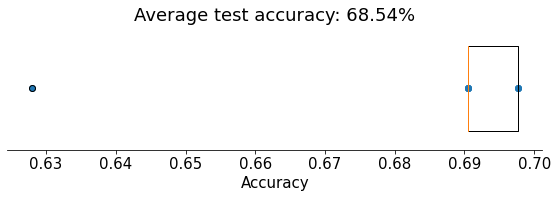

In [265]:
#@title
#@markdown Run to plot out these `k=8` accuracy scores.
f, ax = plt.subplots(figsize=(8, 3))
ax.boxplot(accuracies, vert=False, widths=.7)
ax.scatter(accuracies, np.ones(8))
ax.set(
  xlabel="Accuracy",
  yticks=[],
  title=f"Average test accuracy: {accuracies.mean():.2%}"
)
ax.spines["left"].set_visible(False)
plt.savefig('/home/droumis/Src/capuchin/figures/GLM_Accuracy_PCA_prestim_5PC.png')
plt.show()

In [266]:

def plot_weights(models, sharey=True):
  """Draw a stem plot of weights for each model in models dict."""
  n = len(models)
  f = plt.figure(figsize=(10, 2.5 * n))
  axs = f.subplots(n, sharex=True, sharey=sharey)
  axs = np.atleast_1d(axs)

  for ax, (title, model) in zip(axs, models.items()):

    ax.margins(x=.02)
    stem = ax.stem(model.coef_.squeeze(), use_line_collection=True)
    stem[0].set_marker(".")
    stem[0].set_color(".2")
    stem[1].set_linewidths(.5)
    stem[1].set_color(".2")
    stem[2].set_visible(False)
    ax.axhline(0, color="C3", lw=3)
    ax.set(ylabel="Weight", title=title)
  ax.set(xlabel="Neuron (a.k.a. feature)")
  f.tight_layout()

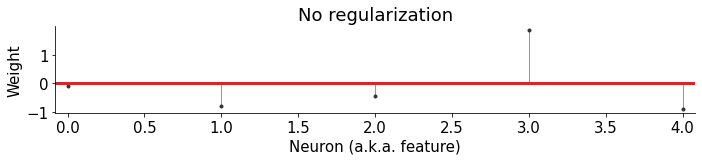

In [190]:
log_reg = LogisticRegression(penalty="none").fit(X, y)
plot_weights({"No regularization": log_reg})

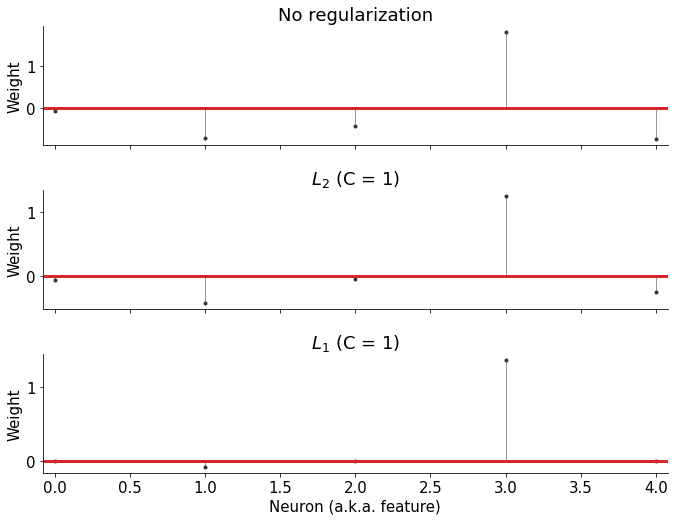

In [268]:
log_reg_l2 = LogisticRegression(penalty="l2", C=1).fit(X, y)
log_reg_l1 = LogisticRegression(penalty="l1", C=1, solver="saga", max_iter=5000)
log_reg_l1.fit(X, y)
# }
# plot_weights(models)
# now show the two models
# models = {
models = {
  "No regularization": log_reg,
  "$L_2$ (C = 1)": log_reg_l2,
  "$L_1$ (C = 1)": log_reg_l1,
}
# plot_weights(models)
plot_weights(models, sharey=False)
plt.savefig('/home/droumis/Src/capuchin/figures/GLM_Accuracy_PCA_prestim_5PC_weights.png')
plt.show()

# top PCs for pre-stim period with 20 PCs
- pre-stim (0:500ms)

In [269]:

start_duration = 0 # in 10ms bin units
end_duration = 50 # in 10ms bin units
n_pcs= 20

NN = len(dat['brain_area']) # number of neurons
NT = dat['spks'][:,:,start_duration:end_duration].shape[-1]

droll = np.reshape(dat['spks'][:,:,start_duration:end_duration], (NN,-1)) # first 80 bins = 1.6 sec
droll = droll - np.mean(droll, axis=1)[:, np.newaxis]
model = PCA(n_components = n_pcs).fit(droll.T)
W = model.components_
pc_10ms = W @ np.reshape(dat['spks'][:,:,start_duration:end_duration], (NN,-1))
pc_10ms = np.reshape(pc_10ms, (n_pcs, -1, NT))

/home/droumis/miniconda3/envs/capuchin/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  
/home/droumis/miniconda3/envs/capuchin/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


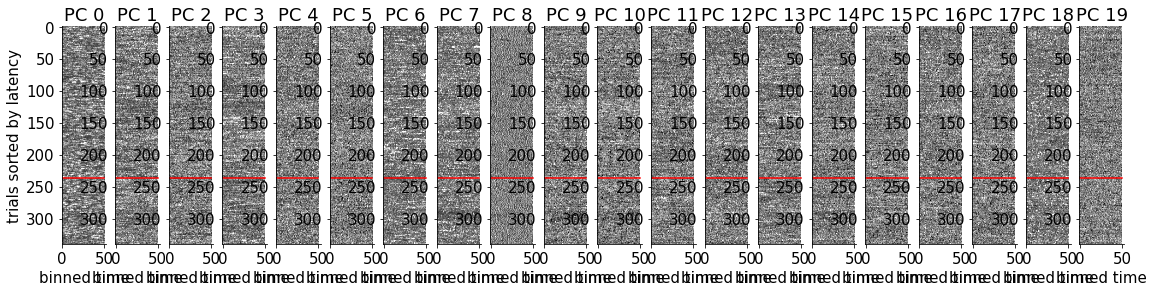

In [270]:

nwrong = np.sum(is_correct)
for j in range(len(pc_10ms)):
  ax = plt.subplot(1,len(pc_10ms)+1,j+1)
  pc1 = zscore(pc_10ms[j])
  plt.imshow(pc1[isort, :], aspect='auto', vmax=2, vmin = -2, cmap = 'gray')
  ax.set(xlabel = 'binned time')
#   plt.axvline(50, c='g')
#   plt.axvline(90, c='y')
  if j==0:
    ax.set(ylabel = 'trials sorted by latency')  
  plt.title('PC %d'%j)

  plt.plot([0, NT], [nwrong, nwrong], 'r')
plt.savefig('/home/droumis/Src/capuchin/figures/PCA_prestim_20PC.png')
plt.show()

/home/droumis/miniconda3/envs/capuchin/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  
/home/droumis/miniconda3/envs/capuchin/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


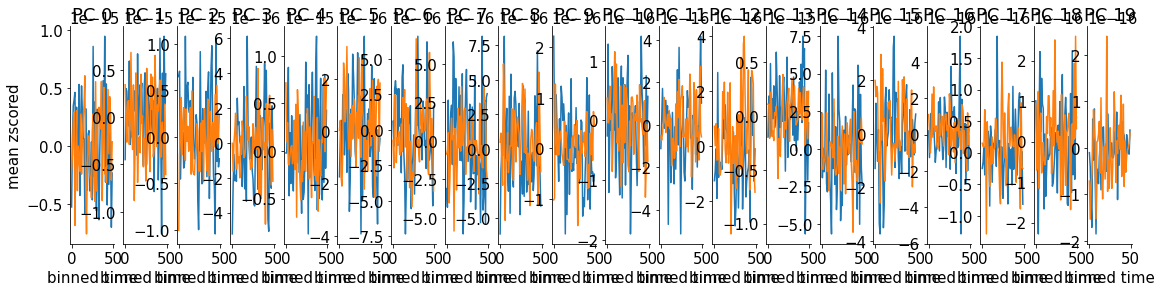

In [271]:
nwrong = np.sum(is_correct)
for j in range(len(pc_10ms)):
  ax = plt.subplot(1,len(pc_10ms)+1,j+1)
  pc1_corr = zscore(pc_10ms[j][is_correct,:])
  pc1_err = zscore(pc_10ms[j][~is_correct,:])
  plt.plot(np.mean(pc1_corr, axis=0))
  plt.plot(np.mean(pc1_err, axis=0))
  ax.set(xlabel = 'binned time')
#   plt.axvline(50, c='g')
#   plt.axvline(90, c='y')
  if j==0:
    ax.set(ylabel = 'mean zscored')  
  plt.title('PC %d'%j)
plt.savefig('/home/droumis/Src/capuchin/figures/PCA_prestim_20PC_mean.png')
plt.show()
#   plt.plot([0, NT], [nwrong, nwrong], 'r')

# run GLM with log link func using pre-stim PCs as features and correct as outcome

In [272]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [273]:
prestim_pc_mean = np.mean(pc_10ms, axis = 2).T

In [274]:
X = prestim_pc_mean
y = is_correct

In [275]:
# First define the model
log_reg = LogisticRegression(penalty="none")

#Then fit it to data
log_reg.fit(X, y)

LogisticRegression(penalty='none')

In [276]:
y_pred = log_reg.predict(X)

In [277]:
# to_remove solution
def compute_accuracy(X, y, model):
  """Compute accuracy of classifier predictions.
  
  Args:
    X (2D array): Data matrix
    y (1D array): Label vector
    model (sklearn estimator): Classifier with trained weights.

  Returns:
    accuracy (float): Proportion of correct predictions.  
  """
  y_pred = model.predict(X)
  accuracy = (y == y_pred).mean()

  return accuracy

train_accuracy = compute_accuracy(X, y, log_reg)
print(f"Accuracy on the training data: {train_accuracy:.2%}")

Accuracy on the training data: 74.12%


In [278]:
accuracies = cross_val_score(LogisticRegression(penalty='none'), X, y, cv=8) # k=8 crossvalidation

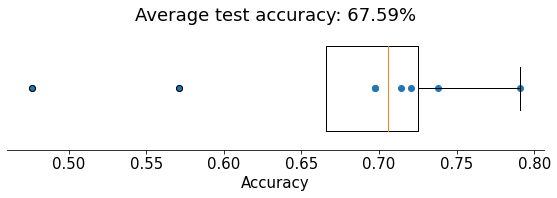

In [279]:
#@title
#@markdown Run to plot out these `k=8` accuracy scores.
f, ax = plt.subplots(figsize=(8, 3))
ax.boxplot(accuracies, vert=False, widths=.7)
ax.scatter(accuracies, np.ones(8))
ax.set(
  xlabel="Accuracy",
  yticks=[],
  title=f"Average test accuracy: {accuracies.mean():.2%}"
)
ax.spines["left"].set_visible(False)
plt.savefig('/home/droumis/Src/capuchin/figures/GLM_Accuracy_PCA_prestim_20PC.png')
plt.show()

In [280]:

def plot_weights(models, sharey=True):
  """Draw a stem plot of weights for each model in models dict."""
  n = len(models)
  f = plt.figure(figsize=(10, 2.5 * n))
  axs = f.subplots(n, sharex=True, sharey=sharey)
  axs = np.atleast_1d(axs)

  for ax, (title, model) in zip(axs, models.items()):

    ax.margins(x=.02)
    stem = ax.stem(model.coef_.squeeze(), use_line_collection=True)
    stem[0].set_marker(".")
    stem[0].set_color(".2")
    stem[1].set_linewidths(.5)
    stem[1].set_color(".2")
    stem[2].set_visible(False)
    ax.axhline(0, color="C3", lw=3)
    ax.set(ylabel="Weight", title=title)
  ax.set(xlabel="Neuron (a.k.a. feature)")
  f.tight_layout()

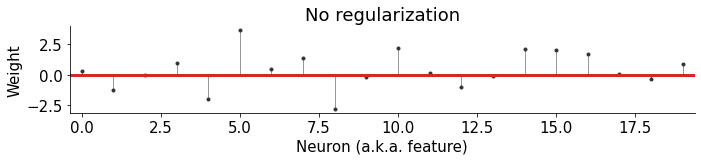

In [206]:
log_reg = LogisticRegression(penalty="none").fit(X, y)
plot_weights({"No regularization": log_reg})

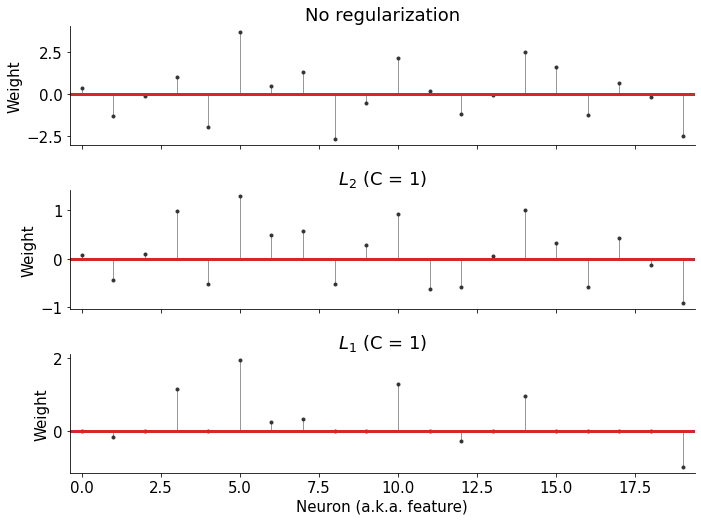

In [281]:
log_reg_l2 = LogisticRegression(penalty="l2", C=1).fit(X, y)
log_reg_l1 = LogisticRegression(penalty="l1", C=1, solver="saga", max_iter=5000)
log_reg_l1.fit(X, y)
# now show the two models
models = {
  "No regularization": log_reg,
  "$L_2$ (C = 1)": log_reg_l2,
  "$L_1$ (C = 1)": log_reg_l1,
}
# plot_weights(models)
plot_weights(models, sharey=False)
plt.savefig('/home/droumis/Src/capuchin/figures/GLM_Accuracy_PCA_prestim_20PC_weights.png')
plt.show()

In [282]:
def plot_non_zero_coefs(C_values, non_zero_l1, n_voxels):
  """Plot the accuracy curve over log-spaced C values."""
  ax = plt.figure().subplots()
  ax.set_xscale("log")
  ax.plot(C_values, non_zero_l1, marker="o")
  ax.set(
    xticks=C_values,
    xlabel="$C$",
    ylabel="Number of non-zero coefficients",
  )
  ax.axhline(n_voxels, color=".1", linestyle=":")
  ax.annotate("Total\n# Neurons", (C_values[0], n_voxels * .98), va="top")

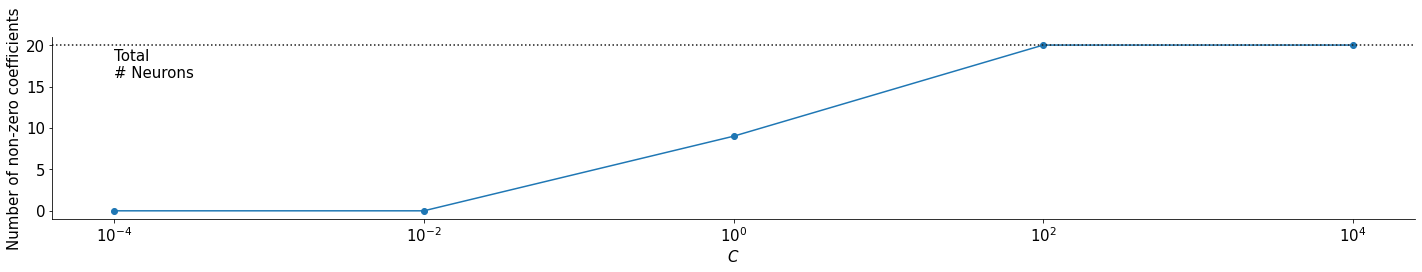

In [284]:
# to_remove solution
def count_non_zero_coefs(X, y, C_values):
  """Fit models with different L1 penalty values and count non-zero coefficients.

  Args:
    X (2D array): Data matrix
    y (1D array): Label vector
    C_values (1D array): List of hyperparameter values

  Returns:
    non_zero_coefs (list): number of coefficients in each model that are nonzero

  """
  non_zero_coefs = []
  for C in C_values:

    # Initialize and fit the model
    # (Hint, you may need to set max_iter)
    model = LogisticRegression(penalty="l1", C=C, solver="saga", max_iter=5000)
    model.fit(X,y)

    # Get the coefs of the fit model
    coefs = model.coef_

    # Count the number of non-zero elements in coefs
    non_zero = np.sum(coefs != 0)
    non_zero_coefs.append(non_zero)

  return non_zero_coefs

# Use log-spaced values for C
C_values = np.logspace(-4, 4, 5)

non_zero_l1 = count_non_zero_coefs(X, y, C_values)

# with plt.xkcd():
plot_non_zero_coefs(C_values, non_zero_l1, n_voxels=X.shape[1])
plt.savefig('/home/droumis/Src/capuchin/figures/GLM_Accuracy_PCA_prestim_20PC_NumNonZeroWeights.png')
plt.show()

In [211]:
def plot_model_selection(C_values, accuracies):
  """Plot the accuracy curve over log-spaced C values."""
  ax = plt.figure().subplots()
  ax.set_xscale("log")
  ax.plot(C_values, accuracies, marker="o")
  best_C = C_values[np.argmax(accuracies)]
  ax.set(
      xticks=C_values,
      xlabel="$C$",
      ylabel="Cross-validated accuracy",
      title=f"Best C: {best_C:1g} ({np.max(accuracies):.2%})",
  )


In [ ]:
def model_selection(X, y, C_values):
  """Compute CV accuracy for each C value.
  Args:
    X (2D array): Data matrix
    y (1D array): Label vector
    C_values (1D array): Array of hyperparameter values.
  Returns:
    accuracies (1D array): CV accuracy with each value of C.
  """
  accuracies = []
  for C in C_values:

    # Initialize and fit the model
    # (Hint, you may need to set max_iter)
    model = LogisticRegression(penalty="l2", C=C, max_iter=5000)

    # Get the accuracy for each test split
    accs = cross_val_score(model, X, y, cv=8)

    # Store the average test accuracy for this value of C
    accuracies.append(accs.mean())

  return accuracies

# Use log-spaced values for C
C_values = np.logspace(-4, 4, 9)

accuracies = model_selection(X, y, C_values)
# with plt.xkcd():
plot_model_selection(C_values, accuracies)
plt.savefig('/home/droumis/Src/capuchin/figures/GLM_Accuracy_PCA_prestim_20PC_crossValAccuracy.png')
plt.show()